# Implement logistic regression from scratch using Python

Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.1652
Epoch 200, Loss: 0.1085
Epoch 300, Loss: 0.0853
Epoch 400, Loss: 0.0721
Epoch 500, Loss: 0.0633
Epoch 600, Loss: 0.0570
Epoch 700, Loss: 0.0522
Epoch 800, Loss: 0.0483
Epoch 900, Loss: 0.0451


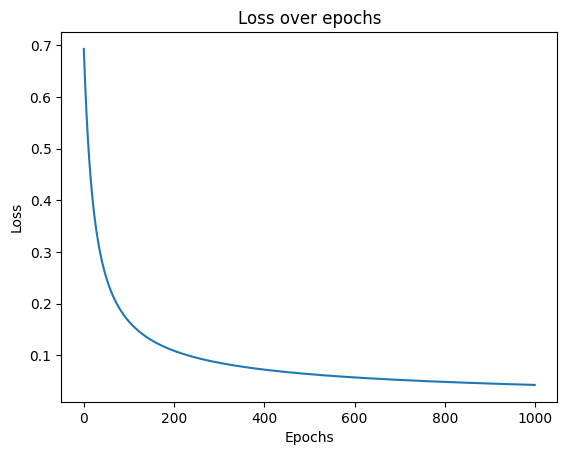

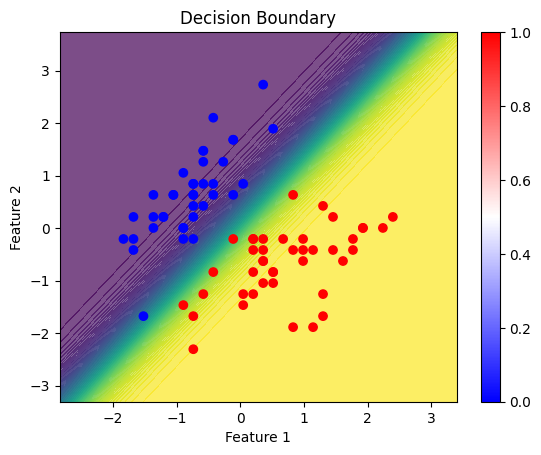

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y, y_hat):
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

def gradient_descent(X, y, y_hat):
    return np.dot(X.T, (y_hat - y)) / y.shape[0]

def logistic_regression(X, y, learning_rate, epochs):
    # Initialize weights and bias
    weights = np.zeros(X.shape[1])
    bias = 0

    losses = []

    for i in range(epochs):
        # Linear model
        z = np.dot(X, weights) + bias
        # Sigmoid activation
        y_hat = sigmoid(z)
        # Compute loss
        loss = compute_loss(y, y_hat)
        losses.append(loss)

        # Gradient computation
        dw = gradient_descent(X, y, y_hat)
        db = np.average(y_hat - y)

        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

        if i % 100 == 0:
            print(f'Epoch {i}, Loss: {loss:.4f}')

    return weights, bias, losses

# Load data
iris = load_iris()
X = iris.data[:100, :2]  # first 100 samples for binary classification, first two features
y = iris.target[:100]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training the model
learning_rate = 0.1
epochs = 1000
weights, bias, losses = logistic_regression(X_train, y_train, learning_rate, epochs)

# Visualize loss
plt.plot(losses)
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Function to plot decision boundary
def plot_decision_boundary(X, y, weights, bias):
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    probs = sigmoid(np.dot(grid, weights) + bias).reshape(xx1.shape)
    plt.contourf(xx1, xx2, probs, alpha=0.7, levels=np.linspace(0, 1, 100))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    plt.show()

# Plot decision boundary on training data
plot_decision_boundary(X_train, y_train, weights, bias)


Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.1652
Epoch 200, Loss: 0.1085
Epoch 300, Loss: 0.0853
Epoch 400, Loss: 0.0721
Epoch 500, Loss: 0.0633
Epoch 600, Loss: 0.0570
Epoch 700, Loss: 0.0522
Epoch 800, Loss: 0.0483
Epoch 900, Loss: 0.0451
Train Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Test Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


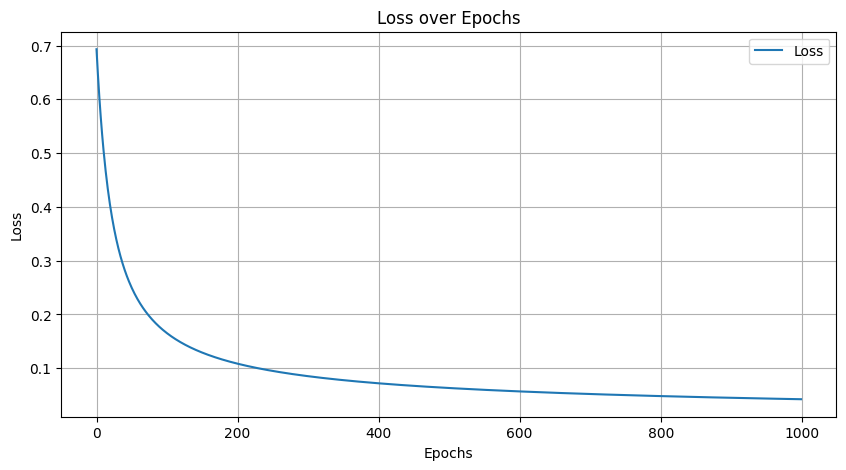

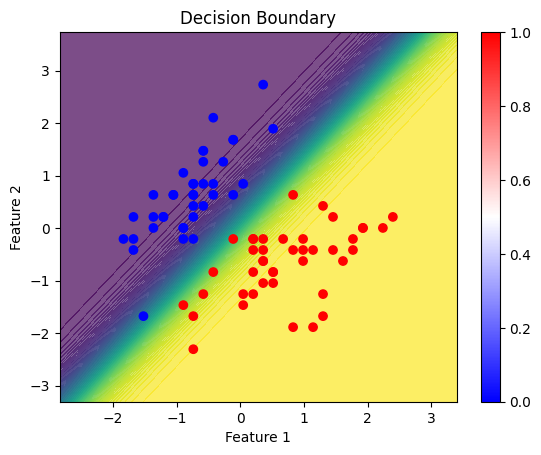

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y, y_hat):
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

def gradient_descent(X, y, y_hat):
    return np.dot(X.T, (y_hat - y)) / y.shape[0]

def logistic_regression(X, y, learning_rate, epochs):
    weights = np.zeros(X.shape[1])
    bias = 0
    losses = []
    for i in range(epochs):
        z = np.dot(X, weights) + bias
        y_hat = sigmoid(z)
        loss = compute_loss(y, y_hat)
        losses.append(loss)
        dw = gradient_descent(X, y, y_hat)
        db = np.average(y_hat - y)
        weights -= learning_rate * dw
        bias -= learning_rate * db

        if i % 100 == 0:
            print(f'Epoch {i}, Loss: {loss:.4f}')

    return weights, bias, losses

def predict(X, weights, bias):
    return sigmoid(np.dot(X, weights) + bias) >= 0.5

# Load data
iris = load_iris()
X = iris.data[:100, :2]
y = iris.target[:100]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
learning_rate = 0.1
epochs = 1000
weights, bias, losses = logistic_regression(X_train, y_train, learning_rate, epochs)

# Predictions
y_pred_train = predict(X_train, weights, bias)
y_pred_test = predict(X_test, weights, bias)

# Evaluation
print("Train Metrics:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1 Score:", f1_score(y_train, y_pred_train))

print("Test Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1 Score:", f1_score(y_test, y_pred_test))

# Visualize loss
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# Function to plot decision boundary
def plot_decision_boundary(X, y, weights, bias):
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    probs = sigmoid(np.dot(grid, weights) + bias).reshape(xx1.shape)
    plt.contourf(xx1, xx2, probs, alpha=0.7, levels=np.linspace(0, 1, 100))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    plt.show()

# Plot decision boundary on training data
plot_decision_boundary(X_train, y_train, weights, bias)